# Temperature NN

### Imports

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import random
from generate_temp_nn_data import GenerateData

### Generate Training Data and Test Data

In [5]:
generate = GenerateData(50,25)

--- 0.014358997344970703 seconds ---


### Compile Basic Feed Forward NN

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(4,activation=tf.nn.softmax))

optim = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optim,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Metal device set to: Apple M2


2022-07-25 15:02:31.650987: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-25 15:02:31.651825: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Train

In [7]:
model.fit(generate.x_train,generate.y_train,epochs=10)

Epoch 1/10


2022-07-25 15:02:35.981413: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-25 15:02:36.154785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 18ms/step - loss: 1.3758 - accuracy: 0.2083
Epoch 2/10
2/2 [==============================] - 0s 7ms/step - loss: 1.2269 - accuracy: 0.5208
Epoch 3/10
2/2 [==============================] - 0s 4ms/step - loss: 1.1113 - accuracy: 0.6667
Epoch 4/10
2/2 [==============================] - 0s 7ms/step - loss: 1.0032 - accuracy: 0.8125
Epoch 5/10
2/2 [==============================] - 0s 5ms/step - loss: 0.9040 - accuracy: 0.9792
Epoch 6/10
2/2 [==============================] - 0s 5ms/step - loss: 0.8141 - accuracy: 0.9583
Epoch 7/10
2/2 [==============================] - 0s 4ms/step - loss: 0.7364 - accuracy: 0.9167
Epoch 8/10
2/2 [==============================] - 0s 4ms/step - loss: 0.6609 - accuracy: 0.9583
Epoch 9/10
2/2 [==============================] - 0s 4ms/step - loss: 0.5958 - accuracy: 1.0000
Epoch 10/10
2/2 [==============================] - 0s 4ms/step - loss: 0.5407 - accuracy: 1.0000


### Evaluate Loss and Accuracy on Test Set

In [8]:
val_loss, val_acc = model.evaluate(generate.x_test,generate.y_test)
print("loss: ",val_loss,"\n","accuracy: ",val_acc)

1/1 [==============================] - 0s 88ms/step - loss: 0.5117 - accuracy: 1.0000
loss:  0.5116863250732422 
 accuracy:  1.0


2022-07-25 15:02:40.625884: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [9]:
model.save('num_model')
new_model = tf.keras.models.load_model('num_model')
print(np.shape(generate.x_test))
predictions = new_model.predict(generate.x_test)

INFO:tensorflow:Assets written to: num_model/assets
(24, 7, 7)
1/1 [==============================] - 0s 32ms/step


2022-07-25 15:02:44.298373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3


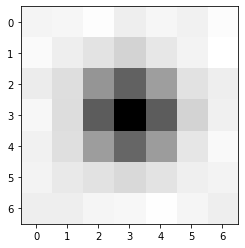

In [10]:
predict_data_point = 13
print(np.argmax(predictions[predict_data_point]))
plt.imshow(generate.x_test[predict_data_point],cmap=plt.cm.binary)